# Exploratory data analysis (EDA)


The purpose of this EDA is to find insights for online store.
Steps involved are -:

- Data cleaning -> Find missing values
- Data preparation -> look for correlation
- Data transformation -> Removing duplicates and unneccesary columns
- Visualization -> Through matplotlib and seaborn
- Last step -> To conclude the insights

This is the very first data analysis. Please take the informations on this notebook with a grain of salt. I'm open to all improvements (even rewording), don't hesitate to leave me a comment or upvote if you found it useful. If I'm completely wrong somewhere or if my findings makes no sense don't hesitate to leave me a comment.
This work was influenced by some kernels and some articles from medium/towards data science.

 <img src="b.png" width="600" align="left">


- Online shopping has grown in popularity over the years, mainly because people find it convenient and easy to bargain shop from the comfort of their home or office.

- One of the most enticing factor about online shopping, particularly during a holiday season, is it alleviates the need to wait in long lines or search from store to store for a particular item.

<img src="a.jpg" width="500" align="left">


# Preparations


For the preparations lets first import the necessary libraries and load the files needed for our EDA

## Import All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Dataset

In [2]:
dataFrame = pd.read_csv('SampleSuperstore.csv')

**Let's read the dataset and analyse rows and columns.**



In [3]:
# First Print any  random 9 rows
dataFrame.sample(9)

Ship Mode    Segment        Country          City         State  \
5399  Standard Class   Consumer  United States   Los Angeles    California   
3924  Standard Class   Consumer  United States       Seattle    Washington   
7885    Second Class   Consumer  United States      Thornton      Colorado   
239     Second Class   Consumer  United States       Chicago      Illinois   
7349  Standard Class  Corporate  United States     Milwaukee     Wisconsin   
496   Standard Class   Consumer  United States    Costa Mesa    California   
42    Standard Class  Corporate  United States   Los Angeles    California   
679   Standard Class   Consumer  United States         Tyler         Texas   
528   Standard Class   Consumer  United States  Philadelphia  Pennsylvania   

      Postal Code   Region         Category Sub-Category    Sales  Quantity  \
5399        90004     West        Furniture    Bookcases  556.665         5   
3924        98103     West  Office Supplies      Storage   30.280         2   
7885        80229     West        Furniture  Furnishings   23.376         3   
239         60610  Central        Furniture  Furnishings   11.688         3   
7349        53209  Central  Office Supplies      Binders   38.820         6   
496         92627     West  Office Supplies      Binders  119.616         8   
42          90049     West  Office Supplies      Storage   77.880         2   
679         75701  Central  Office Supplies      Binders  182.994         3   
528         19134     East  Office Supplies      Storage   36.336         3   

      Discount    Profit  
5399      0.15    6.5490  
3924      0.00    1.2112  
7885      0.20    7.0128  
239       0.60   -4.6752  
7349      0.00   19.4100  
496       0.20   40.3704  
42        0.00    3.8940  
679       0.80 -320.2395  
528       0.20   -7.2672

In [4]:
# Now Let's Check the head of the dataset means check first 5 rows in dataset.
dataFrame.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [5]:
# Now Check last five rows
dataFrame.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [6]:
# Check shape of the dataset  
dataFrame.shape

(9994, 13)

**So in this dataset there are 9994 rows and 13 columns**

In [7]:
# Now check The information about dataset like data types, names number of the columns present in dataset 
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#Check all the dtypes or data-types of columns in the dataset
dataFrame.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
#Find all the columns names in our dataset
dataFrame.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
# Now check the Missing/NAN values .
dataFrame.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# Finding total number of null values in a dataset
print("Total number of null values: ",dataFrame.isnull().sum().sum())

Total number of null values:  0


**Here we can see that there are no missing values present. Hence we can directly go for exploratory analysis part .**

In [12]:
# Now Let's see the Statistical details of our dataset
dataFrame.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [13]:
# Check for unnecessary columns,duplicates and drop them if not required
dataFrame.duplicated().sum()

17

**'Row ID' column is nothing but the serial number so we will drop this column.**

In [14]:
dataFrame.drop_duplicates()
# drop_duplicates returns only the dataframe's unique values
# The first occurrence of the value in the list is kept, but other identical values are deleted

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9977 rows x 13 columns]

In [15]:
# nunique() function return number of unique elements in the object. 
# It returns a scalar value which is the count of all the unique values in the Index. 
# By default the NaN values are not included in the count.
dataFrame.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [16]:
# Now Find the correlation between columns name in our dataset
dataFrame.corr()

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

In [17]:
# Now find the covariance in our dataset
dataFrame.cov()

Postal Code          Sales    Quantity    Discount  \
Postal Code  1.028080e+09 -476682.766590  910.415885  386.870404   
Sales       -4.766828e+05  388434.455308  278.459923   -3.627228   
Quantity     9.104159e+02     278.459923    4.951113    0.003961   
Discount     3.868704e+02      -3.627228    0.003961    0.042622   
Profit      -2.250458e+05   69944.096586   34.534769  -10.615173   

                    Profit  
Postal Code -225045.849445  
Sales         69944.096586  
Quantity         34.534769  
Discount        -10.615173  
Profit        54877.798055

In [18]:
# value_counts() function returns object containing counts of unique values. 
# The resulting object will be in descending order so that the first element is the most frequently-occurring element.
# Excludes NAN values by default.
dataFrame.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit  
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370     2
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288     2
                                            San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780     2
                Corporate    United States  Seattle        Washington  98105        West     Office Supplies  Paper         19.440   3         0.0        9.3312     2
                Home Office  United States  Columbus       Ohio        43229        East     Furniture        Chairs        281.372  2         0.3       -12.0588    2
   

In [19]:
# Now Let's delete the variable 
# Drop postol code column and assigning it to dataFrame1

col = ['Postal Code']
dataFrame1=dataFrame.drop(columns=col,axis=1)

In [20]:
dataFrame['Country'].nunique()

1

In [21]:
dataFrame['Country'].value_counts()


##dropping Country column
#df=df.drop('Country',axis=1)
#df.head()

United States    9994
Name: Country, dtype: int64

**By using above valu_counts() and nunique() we can Clearly say that the data is for US country only.**


**so we can drop the 'Country' column as we dont need any analysis to be done based on it.** 



**Now We can analyse the data from our dataset further in 3 different ways -:**

- PRODUCT LEVEL ANALYSIS
- CUSTOMER LEVEL ANALYSIS
- ORDER LEVEL ANALYSIS



**Now Lets look at the product categories  and sub-categories available to shop for  a customers.**



In [22]:
# Types of Category Available
print(dataFrame['Category'].unique())


#Number/Count of products in each category 
dataFrame['Category'].value_counts()




['Furniture' 'Office Supplies' 'Technology']


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [23]:
#Types of Sub-Category Available
print(dataFrame['Sub-Category'].nunique())


#Number of products in each sub-category
dataFrame['Sub-Category'].value_counts()

17


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

# Visualization of the dataset

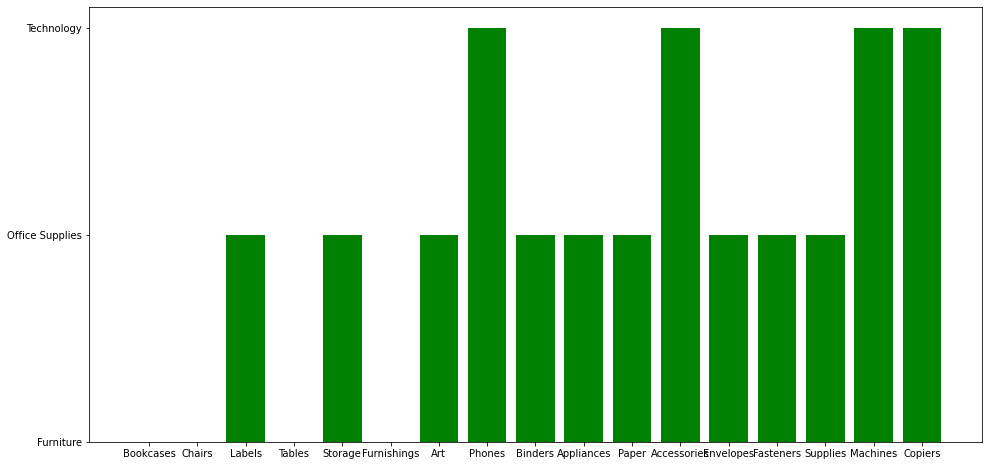

In [24]:
#First Let's see how sub-categories are distributed with respect to category.
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=dataFrame,color='g')
plt.show()


- From the above graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


/Users/ashishchaudhary/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


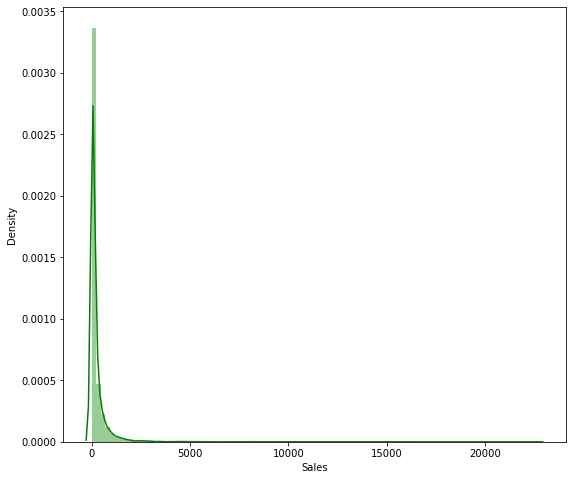

In [25]:
# Now Let's take a look at how the sales  is distributed
print(dataFrame['Sales'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataFrame['Sales'], color='g', bins=100, hist_kws={'alpha': 0.4});

**Note: By using the log function which is present in numpy could also do the job**



**Now Draw a pie chart to visualise the sub-category**

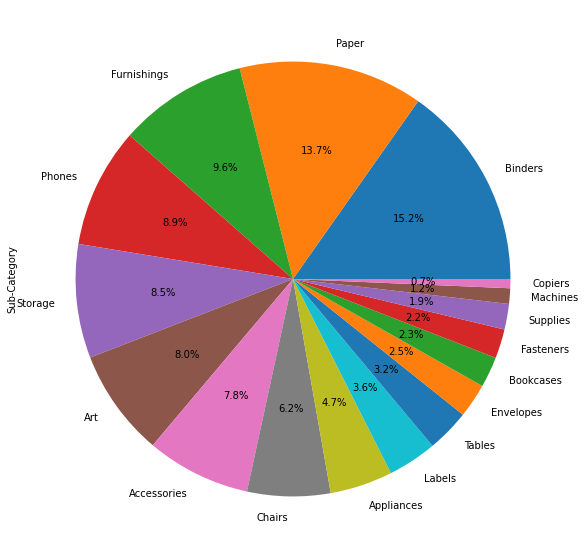

In [26]:
plt.figure(figsize=(12,10))
dataFrame['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

- **So from above pie chart we can say that the store has wide variety of Office Supplies especially in Binders and Paper department.**

**Now analyse the profit and sales for sub-category using bar chart**

/Users/ashishchaudhary/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


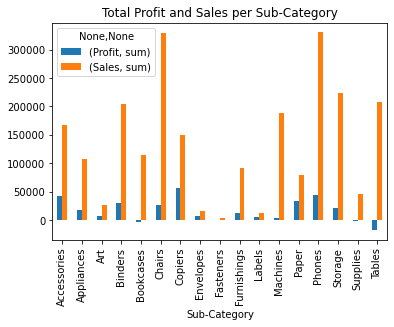

In [27]:
dataFrame.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

- **From the above chart we can say that the Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.**

- **Another interesting fact is that people don't prefer to buy Fasteners and Tables from Superstore. Hence these departments are in loss.**

- **Now Lets Draw a count plot for products in sub-category by region-wise**

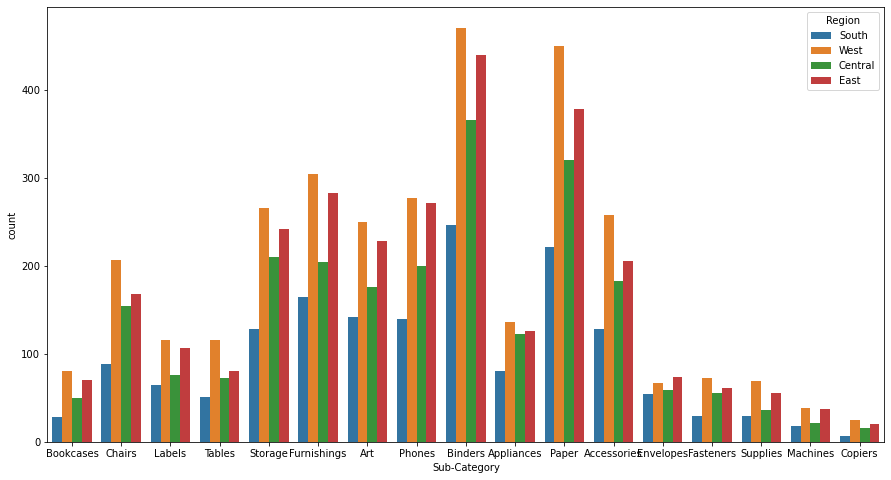

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=dataFrame)
plt.show()

- **From above plot we can say that people who are residing in Western part of US tend to order more from superstore.**

# Feature Creation

**For better understanding of data. I will create some new columns like cost of the product and profit %**

In [29]:
dataFrame['Cost']=dataFrame['Sales']-dataFrame['Profit']
print(dataFrame['Cost'].head())

dataFrame['Profit %']=(dataFrame['Profit']/dataFrame['Cost'])*100

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64


In [30]:
dataFrame.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit       Cost   Profit %  
0      0.00   41.9136   220.0464  19.047619  
1      0.00  219.5820   512.3580  42.857143  
2      0.00    6.8714     7.7486  88.679245  
3      0.45 -383.0310  1340.6085 -28.571429  
4      0.20    2.5164    19.8516  12.676056

In [31]:
# Profit Percentage of first 5 product names
print(dataFrame['Sub-Category'].head() , dataFrame['Profit %'].head())


0    Bookcases
1       Chairs
2       Labels
3       Tables
4      Storage
Name: Sub-Category, dtype: object 0    19.047619
1    42.857143
2    88.679245
3   -28.571429
4    12.676056
Name: Profit %, dtype: float64


In [32]:
#Products with high Profit Percentage 
dataFrame.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)




Ship Mode      Segment        Country           City  \
1696    Second Class  Home Office  United States        Bayonne   
2592    Second Class    Corporate  United States    Summerville   
6338  Standard Class    Corporate  United States  New York City   
246     Second Class  Home Office  United States      Lakeville   
381      First Class    Corporate  United States  San Francisco   
...              ...          ...            ...            ...   
8916  Standard Class    Corporate  United States         Austin   
8766  Standard Class    Corporate  United States     Fort Worth   
9164  Standard Class     Consumer  United States        Chicago   
261   Standard Class    Corporate  United States       Pasadena   
676   Standard Class     Consumer  United States          Tyler   

               State  Postal Code   Region         Category Sub-Category  \
1696      New Jersey         7002     East       Technology       Phones   
2592  South Carolina        29483    South       Technology       Phones   
6338        New York        10035     East       Technology       Phones   
246        Minnesota        55044  Central  Office Supplies        Paper   
381       California        94109     West  Office Supplies        Paper   
...              ...          ...      ...              ...          ...   
8916           Texas        78745  Central  Office Supplies   Appliances   
8766           Texas        76106  Central  Office Supplies   Appliances   
9164        Illinois        60610  Central  Office Supplies   Appliances   
261            Texas        77506  Central  Office Supplies   Appliances   
676            Texas        75701  Central  Office Supplies   Appliances   

        Sales  Quantity  Discount    Profit      Cost    Profit %  
1696  104.980         2       0.0   52.4900   52.4900  100.000000  
2592   79.100         2       0.0   39.5500   39.5500  100.000000  
6338   87.800         4       0.0   43.9000   43.9000  100.000000  
246    47.880         6       0.0   23.9400   23.9400  100.000000  
381    50.960         7       0.0   25.4800   25.4800  100.000000  
...       ...       ...       ...       ...       ...         ...  
8916   48.784         4       0.8 -131.7168  180.5008  -72.972973  
8766   24.588         3       0.8  -67.6170   92.2050  -73.333333  
9164  143.128         2       0.8 -393.6020  536.7300  -73.333333  
261     1.624         2       0.8   -4.4660    6.0900  -73.333333  
676     2.688         3       0.8   -7.3920   10.0800  -73.333333  

[2173 rows x 15 columns]

- **from above we can say that Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.**


**Now lets look at the data with respect to segment level**

/Users/ashishchaudhary/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


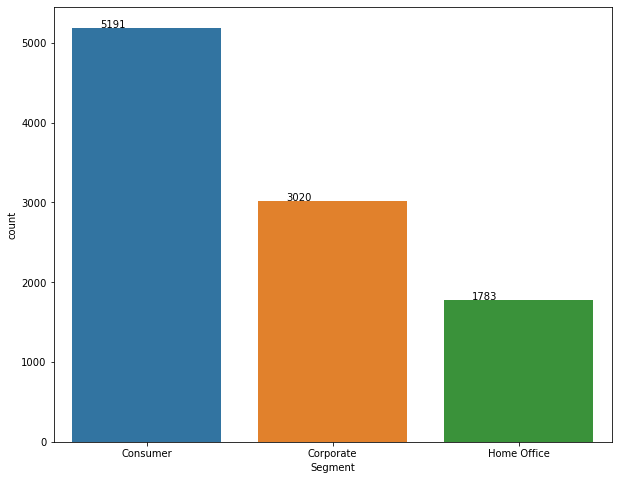

In [33]:
dataFrame['Segment'].nunique()
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = dataFrame)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

- **From the above distribution plot we can say that the distribution is highest in Consumer Segment.**

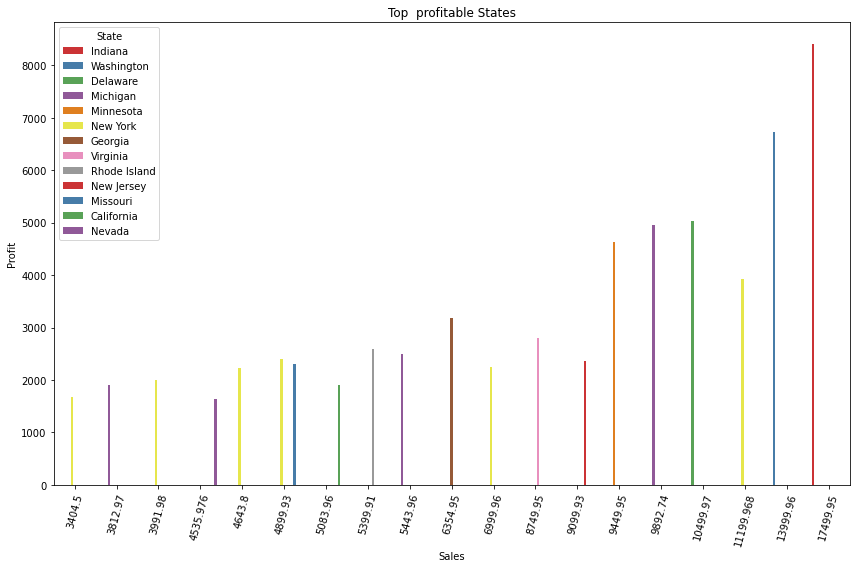

In [34]:
# Top states from which store gets the maximum sales and profit
sortedTop = dataFrame.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Sales', y='Profit',hue='State',palette='Set1', data=sortedTop, ax=ax)
ax.set_title("Top  profitable States")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

-**From above We can see that majority of the profit and sales are from Indiana and Washington State.**

**Now lets calculate profit gained in each category**

/Users/ashishchaudhary/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


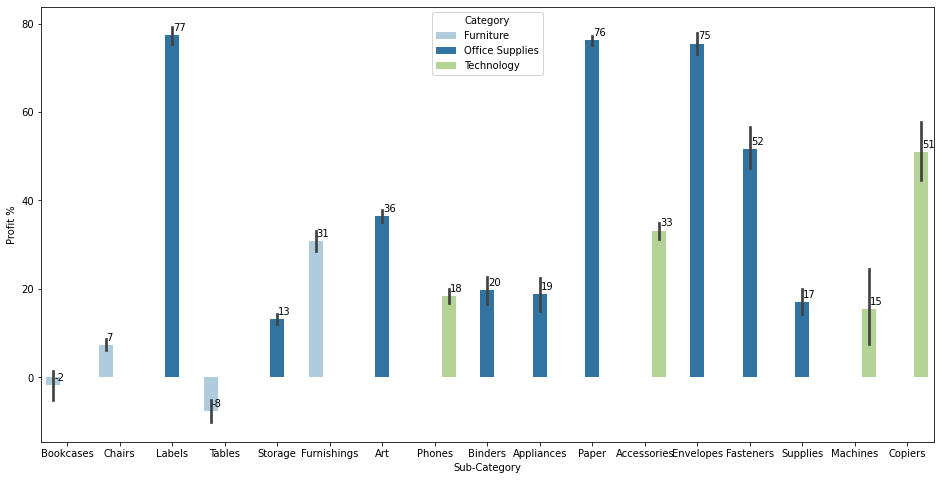

In [35]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('Sub-Category','Profit %',hue='Category',palette='Paired',data=dataFrame)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

- **From above we can say that highest profit comes from Office supplies category**

**State Wise Count-plot**

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

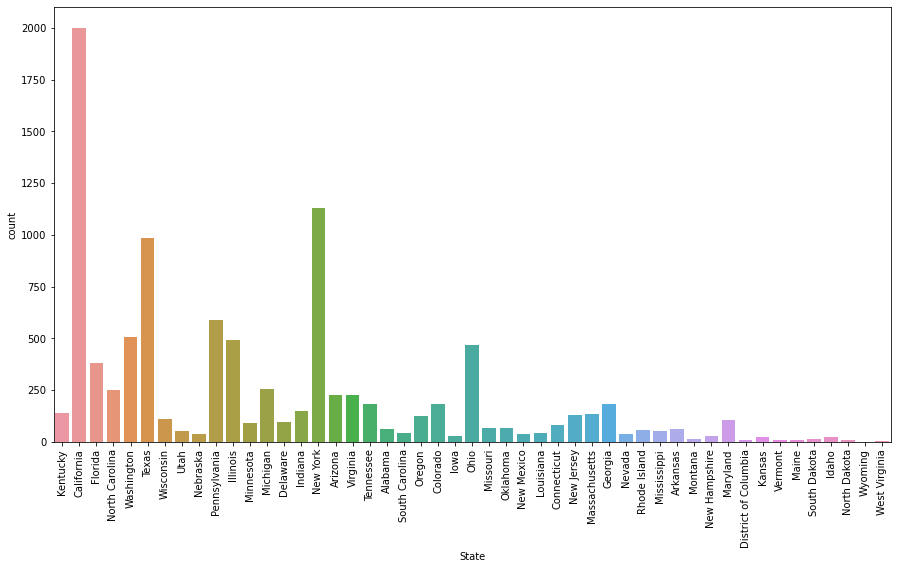

In [36]:
print(dataFrame1['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=dataFrame1['State'])
plt.xticks(rotation=90)
plt.show()

**Now Lets see how discount will effect on profits**

/Users/ashishchaudhary/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


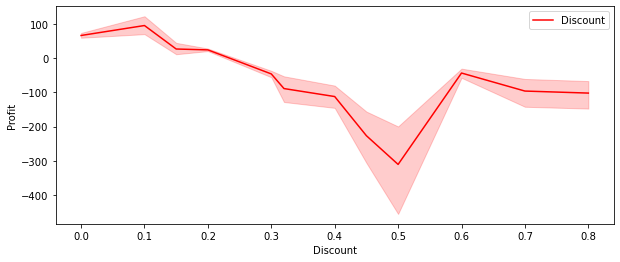

In [37]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = dataFrame, color = 'r', label= 'Discount')
plt.legend()

- **From above we can say that either we should give discount between 40 to 60 %**

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


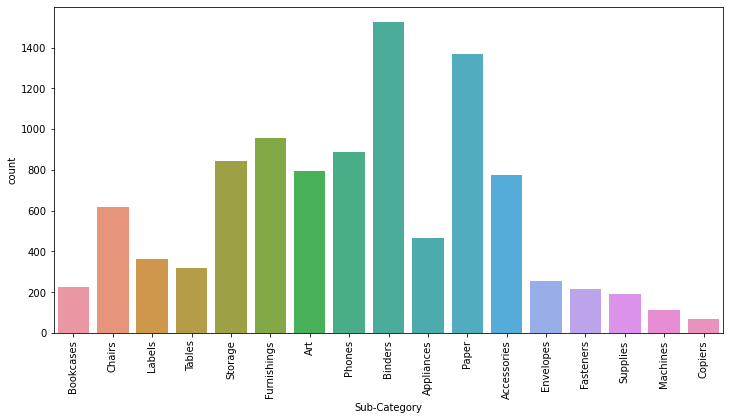

In [38]:
# From this plot we can say that Binders are the most selling product
print(dataFrame1['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=dataFrame1['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

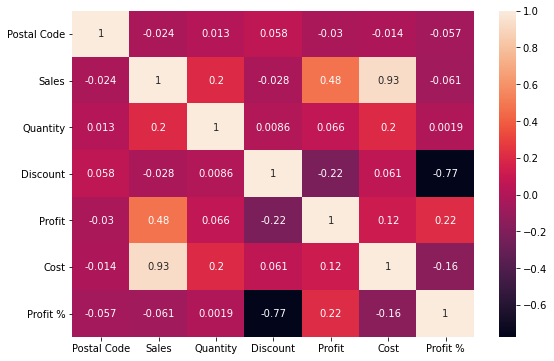

In [39]:
# Now Let's plot the heatmap for analysing the correlation 
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(dataFrame.corr(),annot=True)
plt.show()

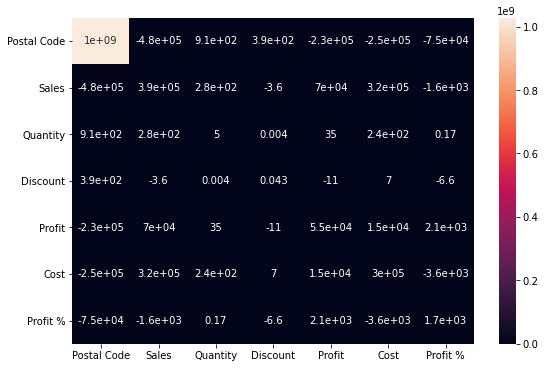

In [40]:
# Now Let's plot the heatmap for analysing the covariance 
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(dataFrame.cov(), annot= True)
plt.show()


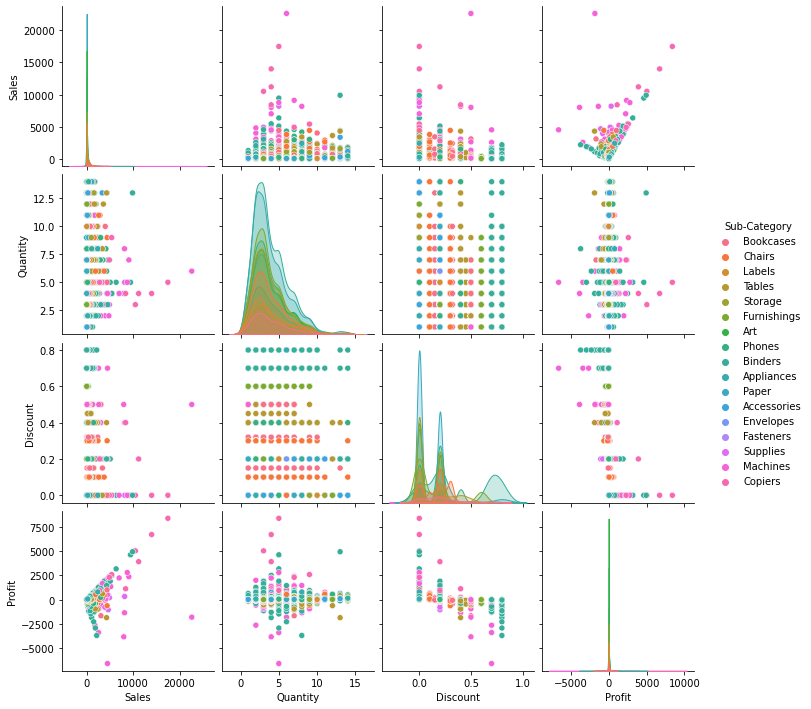

In [41]:
figsize=(15,10)
sns.pairplot(dataFrame1,hue='Sub-Category')

### So Now we Grouped or sum the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales

In [42]:
grouped=pd.DataFrame(dataFrame.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

/Users/ashishchaudhary/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Ship Mode      Segment    Category Sub-Category       State  \
0        First Class     Consumer   Furniture    Bookcases     Arizona   
1        First Class     Consumer   Furniture    Bookcases  California   
2        First Class     Consumer   Furniture    Bookcases    Colorado   
3        First Class     Consumer   Furniture    Bookcases     Florida   
4        First Class     Consumer   Furniture    Bookcases     Georgia   
...              ...          ...         ...          ...         ...   
2978  Standard Class  Home Office  Technology       Phones       Texas   
2979  Standard Class  Home Office  Technology       Phones     Vermont   
2980  Standard Class  Home Office  Technology       Phones    Virginia   
2981  Standard Class  Home Office  Technology       Phones  Washington   
2982  Standard Class  Home Office  Technology       Phones   Wisconsin   

       Region  Quantity  Discount     Sales    Profit  
0        West         5      0.70   181.470 -320.5970  
1        West         9      0.45  1809.497  243.2526  
2        West         3      0.70    89.991 -152.9847  
3       South         3      0.20   314.352  -15.7176  
4       South         5      0.00   354.900   88.7250  
...       ...       ...       ...       ...       ...  
2978  Central        12      0.60   808.704   77.9712  
2979     East         5      0.00  1294.750  336.6350  
2980    South        17      0.00   365.130   58.7384  
2981     West        17      1.20  1989.448   63.2645  
2982  Central         1      0.00   125.990   35.2772  

[2983 rows x 10 columns]

### Now lets see the  sum,mean,min,max,count median,standard deviation,Variance of each states of Profit

In [43]:
dataFrame.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

sum        mean        min        max  count  \
State                                                                       
Alabama                5786.8253   94.865989     0.0000  1459.2000     61   
Arizona               -3427.9246  -15.303235  -814.4832   211.4955    224   
Arkansas               4008.6871   66.811452     1.4190   843.1706     60   
California            76381.3871   38.171608  -325.5720  1906.4850   2001   
Colorado              -6527.8579  -35.867351 -3399.9800   247.9960    182   
Connecticut            3511.4918   42.823071   -15.5826   294.6710     82   
Delaware               9977.3748  103.930988   -48.7839  5039.9856     96   
District of Columbia   1059.5893  105.958930     4.4344   648.5624     10   
Florida               -3399.3017   -8.875461 -1811.0784   327.5922    383   
Georgia               16250.0433   88.315453     0.1134  3177.4750    184   
Idaho                   826.7231   39.367767     1.1151   259.5297     21   
Illinois             -12607.8870  -25.625787 -2929.4845   874.9875    492   
Indiana               18382.9363  123.375411     0.0000  8399.9760    149   
Iowa                   1183.8119   39.460397     2.5920   394.2680     30   
Kansas                  836.4435   34.851813     1.7280   149.3820     24   
Kentucky              11199.6966   80.573357     0.0000  1416.8000    139   
Louisiana              2196.1023   52.288150     1.8672   346.0396     42   
Maine                   454.4862   56.810775     3.8822   131.3550      8   
Maryland               7031.1788   66.963608   -47.1798  1270.9900    105   
Massachusetts          6785.5016   50.262975  -297.6848   503.7822    135   
Michigan              24463.1876   95.934069     0.0000  4946.3700    255   
Minnesota             10823.1874  121.608847     0.0000  4630.4755     89   
Mississippi            3172.9762   59.867475     0.0000   388.8128     53   
Missouri               6436.2105   97.518341     2.2990  2302.9671     66   
Montana                1833.3285  122.221900     2.2098  1379.9770     15   
Nebraska               2037.0942   53.607742     0.2016   743.9880     38   
Nevada                 3316.7659   85.045279  -109.5822  1644.2913     39   
New Hampshire          1706.5028   63.203807  -105.3164   517.4793     27   
New Jersey             9772.9138   75.176260   -31.3722  2365.9818    130   
New Mexico             1157.1161   31.273408    -5.6943   138.3552     37   
New York              74038.5486   65.637011  -553.6476  3919.9888   1128   
North Carolina        -7490.9122  -30.083985 -3839.9904   303.8040    249   
North Dakota            230.1497   32.878529     0.8680   162.0948      7   
Ohio                 -16971.3766  -36.186304 -6599.9780   607.6080    469   
Oklahoma               4853.9560   73.544788     0.5520   523.7052     66   
Oregon                -1190.4705   -9.600569  -384.7164   228.0792    124   
Pennsylvania         -15559.9603  -26.507598 -1665.0522  1119.9968    587   
Rhode Island           7285.6293  130.100523  -127.5792  2591.9568     56   
South Carolina         1769.0566   42.120395     0.5584   422.5100     42   
South Dakota            394.8283   32.902358     1.3068   132.5898     12   
Tennessee             -5341.6936  -29.189583 -1237.8462   223.9936    183   
Texas                -25729.3563  -26.121174 -3701.8928   624.9875    985   
Utah                   2546.5335   48.047802     0.2016   449.9850     53   
Vermont                2244.9783  204.088936     0.9588  1013.1270     11   
Virginia              18597.9504   83.026564     0.0000  2799.9840    224   
Washington            33402.6517   66.013146   -73.0548  6719.9808    506   
West Virginia           185.9216   46.480400   -76.9536   219.4416      4   
Wisconsin              8401.8004   76.380004     0.2598   673.8816    110   
Wyoming                 100.1960  100.196000   100.1960   100.1960      1   

                         median         std            var  
State                                   

### Now lets check number of quantity of products sold w.r.t sales

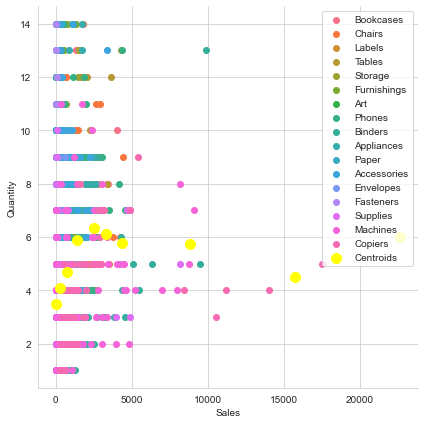

In [44]:
x = dataFrame.iloc[:, [9, 10, 11, 12]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

sns.set_style("whitegrid") 
sns.FacetGrid(dataFrame, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [45]:
Q1 = dataFrame.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = dataFrame.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')
IQR = Q3 - Q1

print(IQR)

Postal Code    66785.000000
Sales            192.660000
Quantity           3.000000
Discount           0.200000
Profit            27.635250
Cost             169.538100
Profit %          48.754637
dtype: float64


# Conclusion

Dataset there are 9994 rows and 13 columns


I have analysed the data from our dataset further in 3 different ways -:

- PRODUCT LEVEL ANALYSIS
- CUSTOMER LEVEL ANALYSIS
- ORDER LEVEL ANALYSIS


 The store has wide variety of Office Supplies especially in Binders and Paper department.

The Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products

Another interesting fact is that people don't prefer to buy Fasteners and Tables from Superstore. Hence these departments are in loss.


People who are residing in Western part of US tend to order more from superstore.


Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

The distribution is highest in Consumer Segment.**



Majority of the profit and sales are from Indiana and Washington State.


The  highest profit comes from Office supplies category


And Binder is the most selling product



